In [1]:
savedir = "../../plots/singlelep/123j1b/"
selection = 'e'

In [2]:
from pylab import *
plt.rc('figure',facecolor='w')

In [3]:
#ptbin = np.array([30,32,34,36,38,40,45,50,60,9999])
ptbin =  np.array([25,26, 28, 30,32,34,36,38,40,45,50,60,9999])
etabin = np.array([-2.5, -2.0, -1.8, -1.444, -1.1, -0.6, 0.0, 0.6, 1.1, 1.444, 1.8, 2.0, 2.5])

ptcenter = (ptbin[:-1]+ptbin[1:])/2
pthalfr =  (ptbin[:-1]-ptbin[1:])/2

etacenter = (etabin[:-1]+etabin[1:])/2
etahalfr =  (etabin[:-1]-etabin[1:])/2

In [4]:
sf = np.load("{}/SF_{}_2d.npy".format(savedir,selection))
sferr = np.load("{}/SF_std_{}_2d.npy".format(savedir,selection))

TypeError: Dimensions of C (12, 9) are incompatible with X (13) and/or Y (13); see help(pcolor)

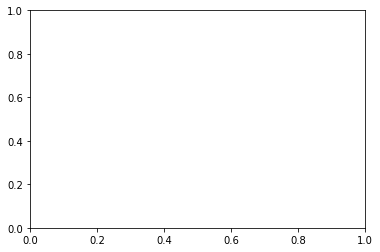

In [5]:
plt.pcolor(ptbin, etabin, sf.T, cmap="Spectral",vmax=10,vmin=0)
plt.colorbar()
plt.xlabel("pt")
plt.ylabel("eta")
plt.axhline(1.444,color='k',linestyle="--")
plt.axhline(-1.444,color='k',linestyle="--")
plt.axvline(30,color='k',linestyle="--")
plt.title("SF "+selection)
plt.xlim(20,100)

In [51]:
sf = (sf[:,:]+sf[:,::-1])[:,:6]/2

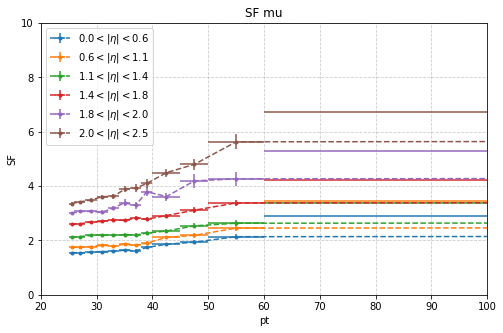

In [55]:
plt.figure(figsize=(8,5))
for i in range(5,-1,-1):
    text = "{:.1f}".format(abs(etacenter[i]-etahalfr[i]))+r"$<|\eta|<$"+"{:.1f}".format(abs(etacenter[i]+etahalfr[i]))    
    plt.errorbar(ptcenter, sf[:,i],xerr=pthalfr, yerr=sferr[:,i], fmt='.--', label=text )
plt.legend(loc="upper left")
plt.xlabel("pt")
plt.ylabel("SF")
plt.title("SF "+selection)
plt.grid(color="grey",linestyle="--",alpha=0.4)
plt.xlim(20,100)
plt.ylim(0,10)
plt.savefig("{}/SF_{}_1d.png".format(savedir,selection),dpi=300)

In [1]:
from utility_dfplotter import *

In [2]:
1+1

2

In [2]:

selection = "etau_fakes_ss"
p = DFPlotter(selection, '>=1', njet=None, folderOfPickles='pickles')
dfList = p.getDataFrameList()

/home/zchen/Documents/Analysis/wbranch/data/pickles/etau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles/etau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles/etau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles/etau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles/etau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles/etau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles/etau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles/etau_fakes/


In [3]:
j = np.searchsorted(etabin, dfList[0].lepton1_eta)
i = np.searchsorted(ptbin, dfList[0].lepton1_pt)
sfpad = np.pad(sf,((1,1),(1,1)),'edge')
w = sfpad[i,j]
dfList[0].eventWeight = dfList[0].eventWeight*w
# slt = dfList[0].nJets>4
# dfList[0].loc[slt, 'eventWeight'] *=0

NameError: name 'etabin' is not defined

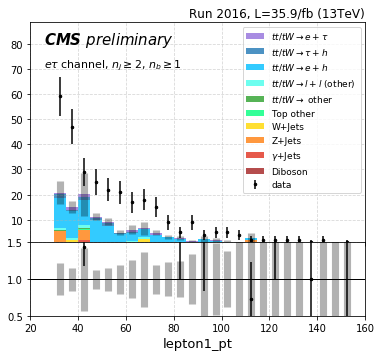

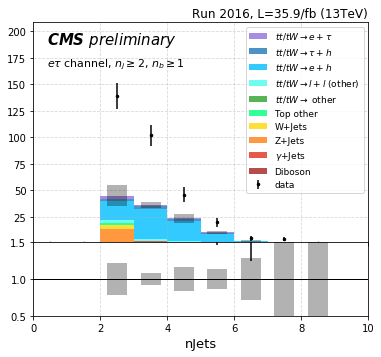

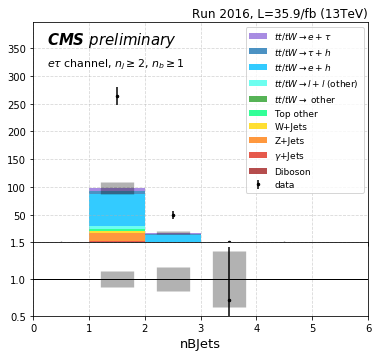

In [3]:
savedir = "../../plots/singlelep/4j1b/"

prefix = "applyMC_123j1b"

v,a,b,step,xl  = ('lepton1_pt', 20, 160, 5, 'lepton1_pt')
sk = ASingleKinematicPlot(v,a,b,step,dfList)
sk.settingPlot(xl,p.labelList, p.colorList,logscale=False, withXsErr=False, subtitle=p.subtitle)
sk.makePlot()
# plt.savefig(savedir + prefix + "{}_{}.png".format(selection,v), dpi=300)

# v,a,b,step,xl  = ('lepton1_eta',-4, 4, 0.2, 'leptonOneEta')
# sk = ASingleKinematicPlot(v,a,b,step,dfList)
# sk.settingPlot(xl,p.labelList, p.colorList,logscale=False, withXsErr=False, subtitle=p.subtitle)
# sk.makePlot()
# plt.savefig(savedir + prefix + "{}_{}.png".format(selection,v), dpi=300)

# v,a,b,step,xl  = ('lepton1_mt',0, 160, 5, 'leptonOneMt')
# sk = ASingleKinematicPlot(v,a,b,step,dfList)
# sk.settingPlot(xl,p.labelList, p.colorList,logscale=False, withXsErr=False, subtitle=p.subtitle)
# sk.makePlot()
# plt.savefig(savedir + prefix + "{}_{}.png".format(selection,v), dpi=300)


v,a,b,step,xl  = ('nJets',0,10,1, 'nJets')
sk = ASingleKinematicPlot(v,a,b,step,dfList)
sk.settingPlot(xl,p.labelList, p.colorList,logscale=False, withXsErr=False, subtitle=p.subtitle)
sk.makePlot()
# plt.savefig(savedir + prefix + "{}_{}.png".format(selection,v), dpi=300)

v,a,b,step,xl  = ('nBJets',0,6,1, 'nBJets')
sk = ASingleKinematicPlot(v,a,b,step,dfList)
sk.settingPlot(xl,p.labelList, p.colorList,logscale=False, withXsErr=False, subtitle=p.subtitle)
sk.makePlot()
# plt.savefig(savedir + prefix + "{}_{}.png".format(selection,v), dpi=300)


# v,a,b,step,xl  = ('htSum',100,1000,20, 'htSum')
# sk = ASingleKinematicPlot(v,a,b,step,dfList)
# sk.settingPlot(xl,p.labelList, p.colorList,logscale=False, withXsErr=False, subtitle=p.subtitle)
# sk.makePlot()
# # plt.savefig(savedir + prefix + "{}_{}.png".format(selection,v), dpi=300)

# v,a,b,step,xl  = ('ht',0,500,10, 'ht')
# sk = ASingleKinematicPlot(v,a,b,step,dfList)
# sk.settingPlot(xl,p.labelList, p.colorList,logscale=False, withXsErr=False, subtitle=p.subtitle)
# sk.makePlot()
# plt.savefig(savedir + prefix + "{}_{}.png".format(selection,v), dpi=300)

In [4]:
sk.hdata - sk.mctot

array([ -1.        , 165.20567814,  32.56344715,  -0.39094669,
        -1.        ])

In [10]:
785.06154251+181.71827626+11.48880609

978.26862486